In [41]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets as ds
import matplotlib.pyplot as plt


In [54]:
# 0)prepare data
X_numpy, Y_numpy = ds.make_regression(n_samples=100, n_features=2, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
#shape y from horiz to vertical
Y = Y.view(Y.shape[0],1)

n_samples, n_features = X.shape

In [55]:
# 1)model
input_size = n_features
output_size = Y.shape[1]
model = nn.Linear(input_size, output_size)

In [56]:
# 2)loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [57]:
# 3)training
num_epochs=100
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, Y)

    #backward pass get gradient
    loss.backward()
    
    # update
    optimizer.step()
    
    #empty graident
    optimizer.zero_grad()
    
    if(epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4470.4849
epoch: 20, loss = 3396.6719
epoch: 30, loss = 2625.8171
epoch: 40, loss = 2066.4019
epoch: 50, loss = 1656.3149
epoch: 60, loss = 1352.9215
epoch: 70, loss = 1126.6115
epoch: 80, loss = 956.5735
epoch: 90, loss = 828.0095
epoch: 100, loss = 730.2772


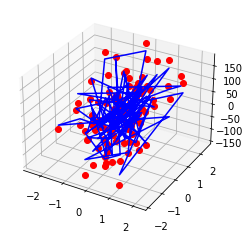

In [58]:
#plot
fig = plt.figure()
ax = plt.axes(projection='3d')
predicted = model(X).detach().numpy()
ax.plot3D(X_numpy[:,0], X_numpy[:,1],Y_numpy, 'ro')
ax.plot3D(X_numpy[:,0], X_numpy[:,1],predicted.reshape(100), 'b')
plt.show()

In [60]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
print(Z.shape)

(30, 30)


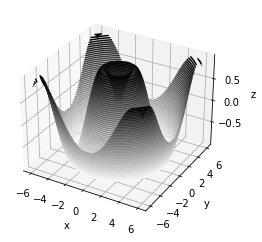

In [50]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');